In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import wikipedia as wiki
import os #For data files extraction from folder

In [3]:
df = pd.read_csv("Data/SourceKaggle/complete.csv")

In [4]:
df.describe()

,awardYear,sortOrder,prizeAmount,prizeAmountAdjusted,id
count,950.000000,950.000000,9.500000e+02,9.500000e+02,950.000000
mean,1971.207368,1.483158,3.460596e+06,6.145681e+06,483.043158
std,33.586969,0.688021,4.014530e+06,3.276874e+06,282.644711
min,1901.000000,1.000000,1.149350e+05,2.377268e+06,1.000000
25%,1947.000000,1.000000,1.703320e+05,3.052326e+06,238.250000
50%,1977.000000,1.000000,7.000000e+05,4.997406e+06,477.500000
75%,2000.000000,2.000000,8.000000e+06,9.044276e+06,727.750000
max,2019.000000,3.000000,1.000000e+07,1.229508e+07,984.000000


In [5]:
cols = df.keys()
print(cols)
print("Number of columns ",len(cols))

Index(['awardYear', 'category', 'categoryFullName', 'sortOrder', 'portion',
       'prizeAmount', 'prizeAmountAdjusted', 'dateAwarded', 'prizeStatus',
       'motivation', 'categoryTopMotivation', 'award_link', 'id', 'name',
       'knownName', 'givenName', 'familyName', 'fullName', 'penName', 'gender',
       'laureate_link', 'birth_date', 'birth_city', 'birth_cityNow',
       'birth_continent', 'birth_country', 'birth_countryNow',
       'birth_locationString', 'death_date', 'death_city', 'death_cityNow',
       'death_continent', 'death_country', 'death_countryNow',
       'death_locationString', 'orgName', 'nativeName', 'acronym',
       'org_founded_date', 'org_founded_city', 'org_founded_cityNow',
       'org_founded_continent', 'org_founded_country',
       'org_founded_countryNow', 'org_founded_locationString', 'ind_or_org',
       'residence_1', 'residence_2', 'affiliation_1', 'affiliation_2',
       'affiliation_3', 'affiliation_4'],
      dtype='object')
Number of columns  5

In [6]:
df.tail()

,awardYear,category,categoryFullName,sortOrder,portion,prizeAmount,prizeAmountAdjusted,dateAwarded,prizeStatus,motivation,...,org_founded_country,org_founded_countryNow,org_founded_locationString,ind_or_org,residence_1,residence_2,affiliation_1,affiliation_2,affiliation_3,affiliation_4
945,1972,Physics,The Nobel Prize in Physics,1,1/3,480000,3345725,NaN,received,for their jointly developed theory of supercon...,...,NaN,NaN,NaN,Individual,NaN,NaN,"University of Illinois, Urbana, IL, USA",NaN,NaN,NaN
946,1954,Chemistry,The Nobel Prize in Chemistry,1,1,181647,2640218,NaN,received,for his research into the nature of the chemic...,...,NaN,NaN,NaN,Individual,NaN,NaN,"California Institute of Technology (Caltech), ...",NaN,NaN,NaN
947,1911,Chemistry,The Nobel Prize in Chemistry,1,1,140695,7327865,NaN,received,in recognition of her services to the advancem...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Sorbonne University, Paris, France",NaN,NaN,NaN
948,1981,Peace,The Nobel Peace Prize,1,1,1000000,2929688,1981-10-14,received,for promoting the fundamental rights of refugees,...,Switzerland,Switzerland,"Geneva, Switzerland",Organization,NaN,NaN,NaN,NaN,NaN,NaN
949,1963,Peace,The Nobel Peace Prize,1,1/2,265000,2839286,1963-10-10,received,for promoting the principles of the Geneva Con...,...,Switzerland,Switzerland,"Geneva, Switzerland",Organization,NaN,NaN,NaN,NaN,NaN,NaN


It has been noticed that there are organizations awarded with Nobel prizes. For the current analysis, it will be focused in Individuals, therefore, we separete the information.

In [7]:
df_ind=df[df["ind_or_org"]=="Individual"]
df_org=df[df["ind_or_org"]!="Individual"]
print(df_ind.shape)
print(df_org.shape)

(923, 52)
(27, 52)


Just for interest, anaysis of how there has been a progression over the time on how the prize amount has increased over the time

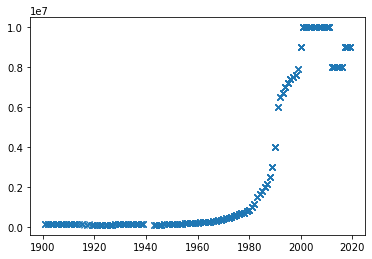

In [8]:
plt.plot(df_ind["awardYear"],df_ind["prizeAmount"],'x')

In [10]:
df_ind

,awardYear,category,categoryFullName,sortOrder,portion,prizeAmount,prizeAmountAdjusted,dateAwarded,prizeStatus,motivation,...,org_founded_country,org_founded_countryNow,org_founded_locationString,ind_or_org,residence_1,residence_2,affiliation_1,affiliation_2,affiliation_3,affiliation_4
0,2001,Economic Sciences,The Sveriges Riksbank Prize in Economic Scienc...,2,1/3,10000000,12295082,2001-10-10,received,for their analyses of markets with asymmetric ...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Stanford University, Stanford, CA, USA",NaN,NaN,NaN
1,1975,Physics,The Nobel Prize in Physics,1,1/3,630000,3404179,1975-10-17,received,for the discovery of the connection between co...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Niels Bohr Institute, Copenhagen, Denmark",NaN,NaN,NaN
2,2004,Chemistry,The Nobel Prize in Chemistry,1,1/3,10000000,11762861,2004-10-06,received,for the discovery of ubiquitin-mediated protei...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Technion - Israel Institute of Technology, Hai...",NaN,NaN,NaN
3,1982,Chemistry,The Nobel Prize in Chemistry,1,1,1150000,3102518,1982-10-18,received,for his development of crystallographic electr...,...,NaN,NaN,NaN,Individual,NaN,NaN,"MRC Laboratory of Molecular Biology, Cambridge...",NaN,NaN,NaN
4,1979,Physics,The Nobel Prize in Physics,2,1/3,800000,2988048,1979-10-15,received,for their contributions to the theory of the u...,...,NaN,NaN,NaN,Individual,NaN,NaN,"International Centre for Theoretical Physics, ...","Imperial College, London, United Kingdom",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,2000,Physics,The Nobel Prize in Physics,1,1/4,9000000,11333109,2000-10-10,received,for developing semiconductor heterostructures ...,...,NaN,NaN,NaN,Individual,NaN,NaN,"A.F. Ioffe Physico-Technical Institute, St. Pe...",NaN,NaN,NaN
943,1980,Chemistry,The Nobel Prize in Chemistry,3,1/4,880000,2889667,1980-10-14,received,for their contributions concerning the determi...,...,NaN,NaN,NaN,Individual,NaN,NaN,"MRC Laboratory of Molecular Biology, Cambridge...",NaN,NaN,NaN
945,1972,Physics,The Nobel Prize in Physics,1,1/3,480000,3345725,NaN,received,for their jointly developed theory of supercon...,...,NaN,NaN,NaN,Individual,NaN,NaN,"University of Illinois, Urbana, IL, USA",NaN,NaN,NaN
946,1954,Chemistry,The Nobel Prize in Chemistry,1,1,181647,2640218,NaN,received,for his research into the nature of the chemic...,...,NaN,NaN,NaN,Individual,NaN,NaN,"California Institute of Technology (Caltech), ...",NaN,NaN,NaN


The names will be used to query the Wikipedia description

In [11]:
people_names = df_ind['name']

In [12]:
page_data = wiki.page(people_names[1]).content
print(page_data)

Aage Niels Bohr (Danish: [ˈɔːwə ˈne̝ls ˈpoɐ̯ˀ] (listen); 19 June 1922 – 8 September 2009) was a Danish nuclear physicist who shared the Nobel Prize in Physics in 1975 with Ben Roy Mottelson and James Rainwater "for the discovery of the connection between collective motion and particle motion in atomic nuclei and the development of the theory of the structure of the atomic nucleus based on this connection". Starting from Rainwater's concept of an irregular-shaped liquid drop model of the nucleus, Bohr and Mottelson developed a detailed theory that was in close agreement with experiments.
Since his father, Niels Bohr, had won the prize in 1922, he and his father are one of the six pairs of fathers and sons who have both won the Nobel Prize and one of the four pairs who have both won the Nobel Prize in Physics.


== Early life and education ==
Bohr was born in Copenhagen on 19 June 1922, the fourth of six sons of the physicist Niels Bohr and his wife Margrethe Bohr (née Nørlund). His olde

After analyzing the data extracted, it seems like the only potential information of interest is before the  == Notes == section, therefore the extarcted information is sliced


In [30]:
notes_index = page_data.find("== Notes ==")
page_data = page_data[0:notes_index]
file_loc = os.getcwd()
with open(file_loc+"\\Data\\NewWiki\\"+people_names[1]+".txt", "w", encoding="utf-8") as text_file:
    text_file.write(page_data)
    text_file.close()

After slicing, the information will be stored in a .csv for optimization purposes. Named after the author of whom the information concerns.

In [28]:
file_loc = os.getcwd()
page_data.to_csv(file_loc+"\\Data\\NewWiki\\"+people_names[1]+".csv")

AttributeError: 'str' object has no attribute 'to_csv'

In [61]:
people_names.to_csv(r"C:\Users\Esteban\Documents\DTU\3rd_Semester\02807_Comp_Tools\GitHub\02807-Computational-Tools\Project\Data\Names.txt",header=None, index=None, sep=' ', mode='a')

In [47]:
wiki_files = os.listdir("Data/Wikipedia/")
print(wiki_files)

['A._Michael_Spence.txt', 'Aage_N._Bohr.txt', 'Aaron_Ciechanover.txt', 'Aaron_Klug.txt', 'Abdus_Salam.txt', 'Abhijit_Banerjee.txt', 'Abiy_Ahmed_Ali.txt', 'Adam_G._Riess.txt', 'Ada_E._Yonath.txt', 'Adolfo_P%C3%A9rez_Esquivel.txt', 'Adolf_Butenandt.txt', 'Adolf_von_Baeyer.txt', 'Adolf_Windaus.txt', 'Ahmed_Zewail.txt', 'Akira_Suzuki.txt', 'Akira_Yoshino.txt', 'Alan_Heeger.txt', 'Alan_Hodgkin.txt', 'Alan_MacDiarmid.txt', 'Albert_A._Michelson.txt', 'Albert_Camus.txt', 'Albert_Claude.txt', 'Albert_Einstein.txt', 'Albert_Fert.txt', 'Albert_Gobat.txt', 'Albert_Luthuli.txt', 'Albert_Schweitzer.txt', 'Albert_Szent-Gy%C3%B6rgyi.txt', 'Albrecht_Kossel.txt', 'Aleksandr_M._Prokhorov.txt', 'Alexandr_Solzhenitsyn.txt', 'Alexei_Abrikosov.txt', 'Alexis_Carrel.txt', 'Alfonso_Garc%C3%ADa_Robles.txt', 'Alfred_D._Hershey.txt', 'Alfred_Fried.txt', 'Alfred_G._Gilman.txt', 'Alfred_Kastler.txt', 'Alfred_Werner.txt', 'Alice_Munro.txt', 'Allan_M._Cormack.txt', 'Allvar_Gullstrand.txt', 'Alphonse_Laveran.txt', 'Alv

In [49]:
idx = 0
for file in wiki_files:
    df = pd.read_csv("Data/Wikipedia/"+file, sep=" | ") #Object dynamic naming
    break

<ipython-input-49-f43b5b73471a>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("Data/Wikipedia/"+file, sep=" | ") #Object dynamic naming


In [50]:
print(df)

Empty DataFrame
Columns: [{"batchcomplete":, "",, "query":, {"normalized":, [{"from":, "A._Michael_Spence",, "to":, "A., Michael, Spence"}],, "pages":, {"359873":, {"pageid":, 359873,, "ns":, 0,, "title":, "A..1, Michael.1, Spence",, "revisions":, [{"slots":, {"main":, {"contentmodel":, "wikitext",, "contentformat":, "text/x-wiki",, "*":, "#REDIRECT, [[Michael, Spence]]"}}}]}}}}]
Index: []

[0 rows x 31 columns]
